**Abstract**

Las enfermedades del tipo cardiovascular, en particular los ataques cardíacos, representan una de las principales causas de mortalidad a nivel mundial, con un impacto significativo en países del tercer mundo como India, donde los factores de riesgo están vinculados principalmente a hábitos de vida (tabaquismo, sedentarismo y dietas no saludables), y otros factores como condiciones médicas (enfermedades como diabetes, hipertensión, alto colesterol y obesidad) y variables demográficas (características poblacionales no modificables como edad y género). según la OMS en india las enfermedades vasculares representan más del 25% de las muertes anuales.
El objetivo de este proyecto es analizar un conjunto de datos de código abierto que contiene información sobre pacientes de India y su riesgo de sufrir ataques al corazón, con el fin de identificar patrones clave que puedan servir para estrategias de prevención.
El dataset elegido para el proyecto se ha obtenido del sitio web Kaggle (www.kaggle.com) recomendado por la clase, ya que es una comunidad que cuenta con datos públicos y gratuitos. El mismo cumple con las condiciones de la consigna, tiene 26 columnas y un total de 10000 filas.
Este dataset incluye variables como edad, género, niveles de colesterol, presión arterial, diabetes, tabaquismo, obesidad y otros indicadores clínicos que fueron mencionados anteriormente como factores de riesgo.
Para esta instancia se utilizarán técnicas de visualización para comprender como interactúan estos factores de riesgo y cuáles tienen mayor peso en el riesgo cardiovascular.

Además se plantean hipótesis específicas que afirman que los pacientes con hipertension, obesidad y diabetes tienen mayor probabilidad de ser clasificados como de alto riesgo. También se explorará si el tabaquismo y el consumo de alcohol actúan como factores agravantes.  

**Objetivo**
Se busca predecir el riesgo de ataque cardíaco utilizando técnicas de ciencia de datos, explorando factores relacionados con salud, estilo de vida y acceso a servicios. Se utilizará un modelo de clasificación y se analizarán los factores más influyentes

**Contexto comercial**
El cliente **CardioHealth India** es una organización de salud pública que desea implementar una solución predictiva para mejorar la prevención de enfermedades cardiovasculares en poblaciones vulnerables.

**Preguntas e hipótesis de interés**

P1.  ¿Cuál es la proporción de hombres y mujeres en el conjunto de datos?

P2. ¿Existe diferencia en el rango de edad con mayor riesgo entre hombres y mujeres?

H1. Los pacientes que no tienen diabetes tienen menor riesgo de ataques al corazón

H2. Los hombres con hipertensión tienen mayor riesgo de infarto que las mujeres hipertensas, especialmente después de los 50 años

H3. Existe una relación entre el colesterol LDL y los triglicéridos.

H4. Un modelo de clasificación será capaz de predecir con precisión el riesgo de ataque cardíaco en base a variables como edad, condiciones médicas previas, estilo de vida y acceso a la salud.

**Análisis exploratorio de los datos**
En primer lugar se realiza un análisis exploratrio de los datos. El conjunto de datos esta compuesto por 10000 filas y 26 columnas.
El mismo representa información médica, demográfica y de estilo de vida de pacientes de India. Se distinguen variables categóricas binarias, numéricas clínicas y variables ordinales.
A continuación se presenta un diccionario de variables con la información tipo, una breve descripción de las mismas, rango/valores y, de corresponder, unidades.

**Variables demográficas**
1. Patient_ID (Categórica): Identificador único de cada paciente.
2. State_Name (Categórica): Estado o región de residencia dentro de India (ej: Tripura).
3. Age (Numérica): Edad del paciente, en un rango de 20 a 79 años.
4. Gender (Categórica): Sexo biológico, con valores posibles: "Male" o "Female".

**Variables clínicas binarias**
Indicadores de condiciones de salud diagnosticadas (0: No, 1: Sí):
1. Diabetes: Diagnóstico de diabetes.
2. Hypertension: Hipertensión arterial.
3. Obesity: Obesidad (IMC ≥30).
4. Smoking: Consumo actual de tabaco.
5. Alcohol_Consumption: Consumo regular de alcohol.
6. Physical_Activity: Actividad física regular (≥150 minutos por semana).
7. Family_History: Antecedentes familiares de enfermedades cardiovasculares.
8. Heart_Attack_History: Ataques cardíacos previos.
9. Health_Insurance: Si posee o no cobertura de salud.
10. Air_Pollution_Exposure: Exposición significativa a contaminación del aire.

**Variables clínicas numéricas**
Indicadores fisiológicos y de laboratorio, con sus respectivas unidades:
1. Diet_Score (0-10 puntos): Calidad de la dieta (mayor puntaje = más saludable).
2. Cholesterol_Level (mg/dL): Colesterol total.
3. Triglyceride_Level (mg/dL): Triglicéridos.
4. LDL_Level (mg/dL): Colesterol LDL ("malo").
5. HDL_Level (mg/dL): Colesterol HDL ("bueno").
6. Systolic_BP (mmHg): Presión arterial sistólica.
7. Diastolic_BP (mmHg): Presión arterial diastólica.
8. Stress_Level (0-10 puntos): Nivel percibido de estrés.

**Variables de contexto y acceso a la salud**
1. Healthcare_Access (Categórica): Acceso a servicios de salud (0: No, 1: Sí).
2. Emergency_Response_Time (Minutos): Tiempo promedio de respuesta en emergencias.
3. Annual_Income (USD o equivalente): Ingresos anuales del paciente.

**Variable objetivo**
1. Heart_Attack_Risk (Binaria): Etiqueta objetivo del modelo. Representa el riesgo predicho o diagnóstico de ataque cardíaco (0: Bajo, 1: Alto).

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Configuración
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# URL cargada en google drive
# El dataset ha sido obtenido de Kaggle
# Se deja link al mismo
# https://www.kaggle.com/datasets/ankushpanday2/heart-attack-risk-and-prediction-dataset-in-india/data
url = "https://docs.google.com/spreadsheets/d/1GN9W4sUNdQsrqE5JrVEXyq_f6A8KCZRjmfhW6hIQbq0/export?format=csv&gid=36559871"
data = pd.read_csv(url)

# Se realiza una exploración inicial
print("Filas y Columnas: ", data.shape)



Filas y Columnas:  (10000, 26)


In [43]:
print("\n Tipo de Datos:\n", data.dtypes)


 Tipo de Datos:
 Patient_ID                  int64
State_Name                 object
Age                         int64
Gender                     object
Diabetes                    int64
Hypertension                int64
Obesity                     int64
Smoking                     int64
Alcohol_Consumption         int64
Physical_Activity           int64
Diet_Score                  int64
Cholesterol_Level           int64
Triglyceride_Level          int64
LDL_Level                   int64
HDL_Level                   int64
Systolic_BP                 int64
Diastolic_BP                int64
Air_Pollution_Exposure      int64
Family_History              int64
Stress_Level                int64
Healthcare_Access           int64
Heart_Attack_History        int64
Emergency_Response_Time     int64
Annual_Income               int64
Health_Insurance            int64
Heart_Attack_Risk           int64
dtype: object


In [44]:
print( "\nColumnas :\n", data.columns)


Columnas :
 Index(['Patient_ID', 'State_Name', 'Age', 'Gender', 'Diabetes', 'Hypertension',
       'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity',
       'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
       'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure',
       'Family_History', 'Stress_Level', 'Healthcare_Access',
       'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income',
       'Health_Insurance', 'Heart_Attack_Risk'],
      dtype='object')


In [45]:
print("\nDescripción de los datos: \n",
data.describe(include='all'))



Descripción de los datos: 
          Patient_ID    State_Name           Age Gender      Diabetes  \
count   10000.00000         10000  10000.000000  10000  10000.000000   
unique          NaN            28           NaN      2           NaN   
top             NaN  Chhattisgarh           NaN   Male           NaN   
freq            NaN           399           NaN   5516           NaN   
mean     5000.50000           NaN     49.394900    NaN      0.092900   
std      2886.89568           NaN     17.280301    NaN      0.290307   
min         1.00000           NaN     20.000000    NaN      0.000000   
25%      2500.75000           NaN     35.000000    NaN      0.000000   
50%      5000.50000           NaN     49.000000    NaN      0.000000   
75%      7500.25000           NaN     64.000000    NaN      0.000000   
max     10000.00000           NaN     79.000000    NaN      1.000000   

        Hypertension       Obesity       Smoking  Alcohol_Consumption  \
count    10000.00000  10000.00000

In [46]:
# Valores perdidos
print("\nIdentificar valores perdidos:\n",
data.isnull().sum())


Identificar valores perdidos:
 Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64


El dataset no cuenta con valores perdidos.

In [47]:
# Variables categóricas
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col} - valores únicos:")
    print(data[col].value_counts())


State_Name - valores únicos:
State_Name
Chhattisgarh         399
Meghalaya            396
Manipur              394
Arunachal Pradesh    392
Kerala               392
Assam                384
Sikkim               379
Goa                  366
Bihar                365
Karnataka            362
Tripura              361
Maharashtra          359
West Bengal          357
Telangana            356
Uttarakhand          350
Mizoram              350
Tamil Nadu           349
Madhya Pradesh       348
Nagaland             347
Himachal Pradesh     347
Andhra Pradesh       342
Haryana              338
Uttar Pradesh        335
Punjab               333
Rajasthan            326
Odisha               326
Gujarat              324
Jharkhand            323
Name: count, dtype: int64

Gender - valores únicos:
Gender
Male      5516
Female    4484
Name: count, dtype: int64


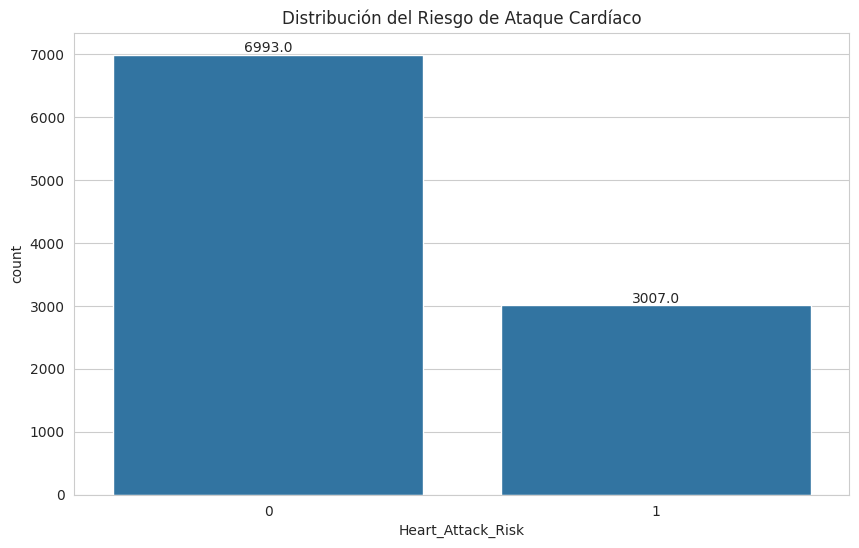

In [48]:
# Analizamos la distribución de la variable objetivo
ax = sns.countplot(data=data, x='Heart_Attack_Risk')
plt.title('Distribución del Riesgo de Ataque Cardíaco')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.show()

Este gráfico de barras muestra la distribución de la variable objetivo **Heart_Attack_Risk**:

Clase 0 (bajo riesgo): aproximadamente 6993 registros.
Clase 1 (alto riesgo): aproximadamente 3007 registros.

Con este gráfico podemos observar que hay una distribución desbalanceada de la variable objetivo: hay más del doble de casos con bajo riesgo que con alto riesgo. Esto podría afectar en el resultado del modelo causando tendencia a predecir la clase mayoritaria (clase 0), lo que podría afectar negativamente la precisión sobre la clase minoritaria (clase 1), que es precisamente lo que más nos interesa.


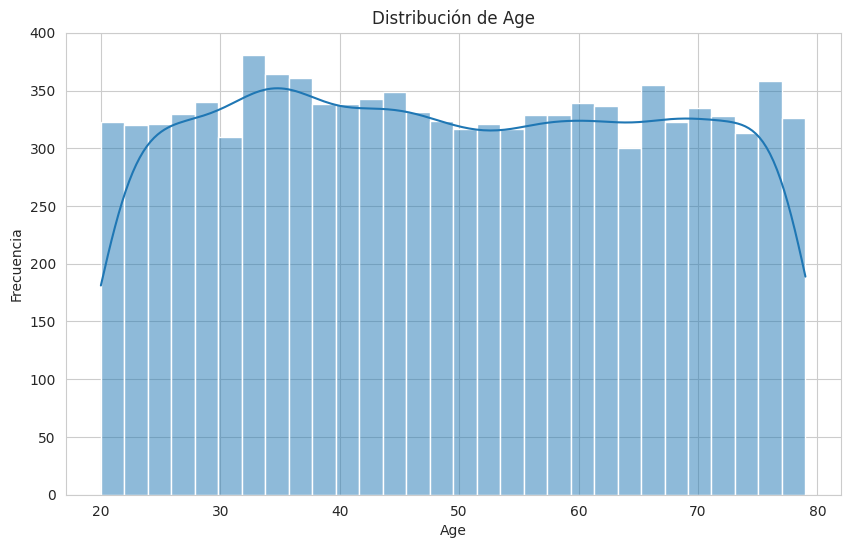

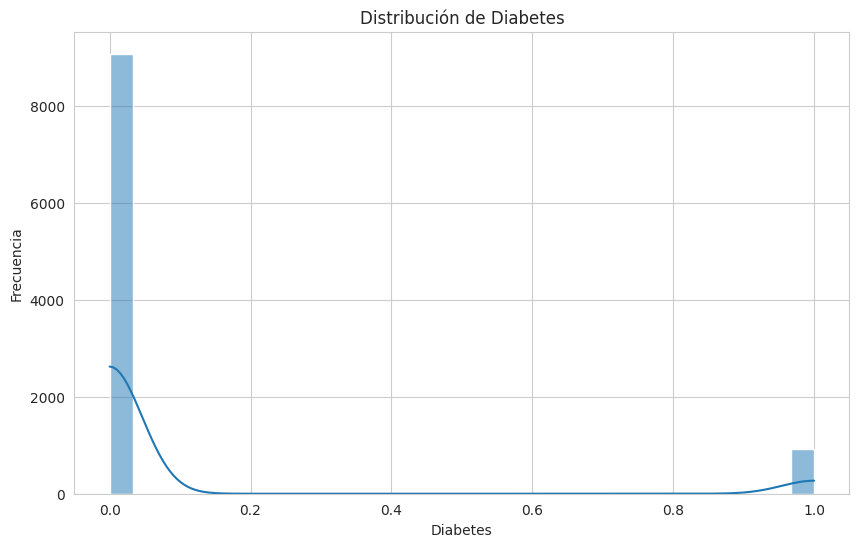

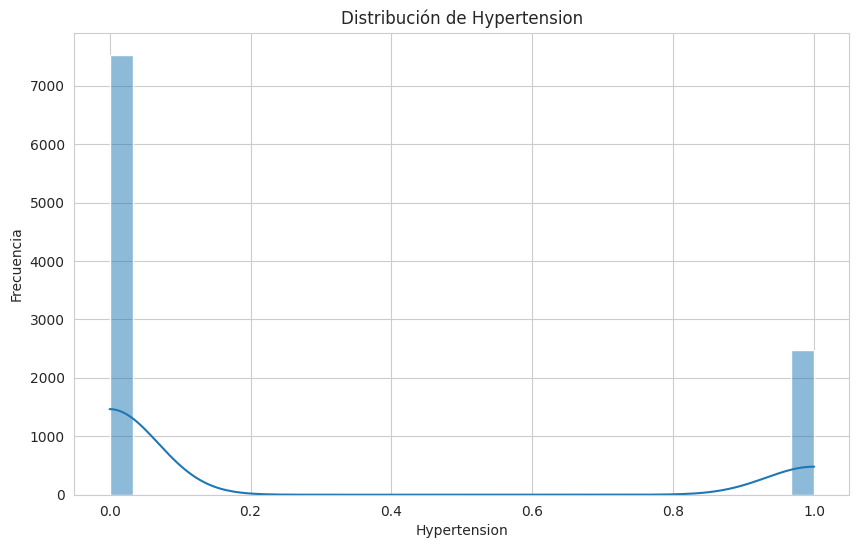

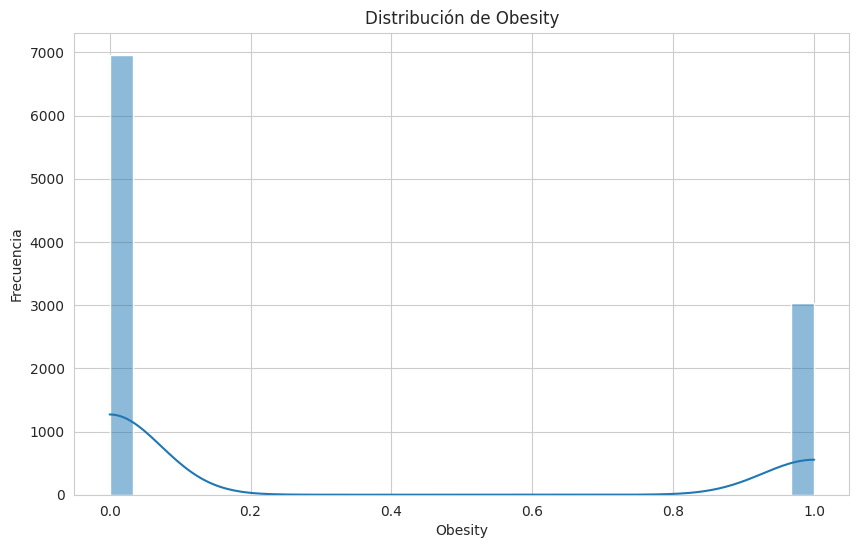

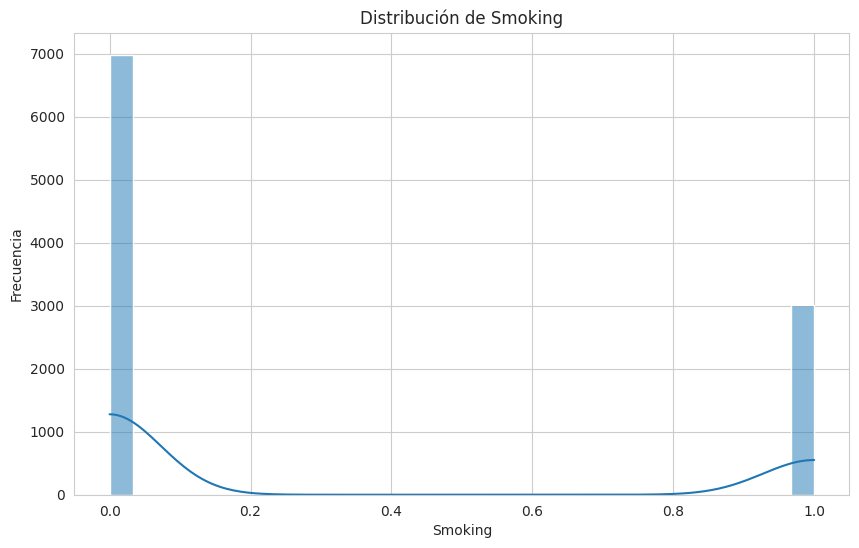

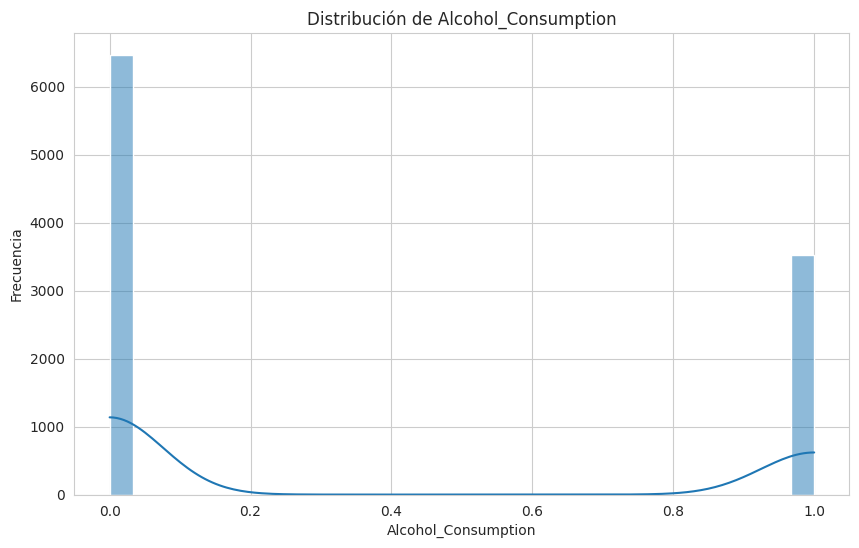

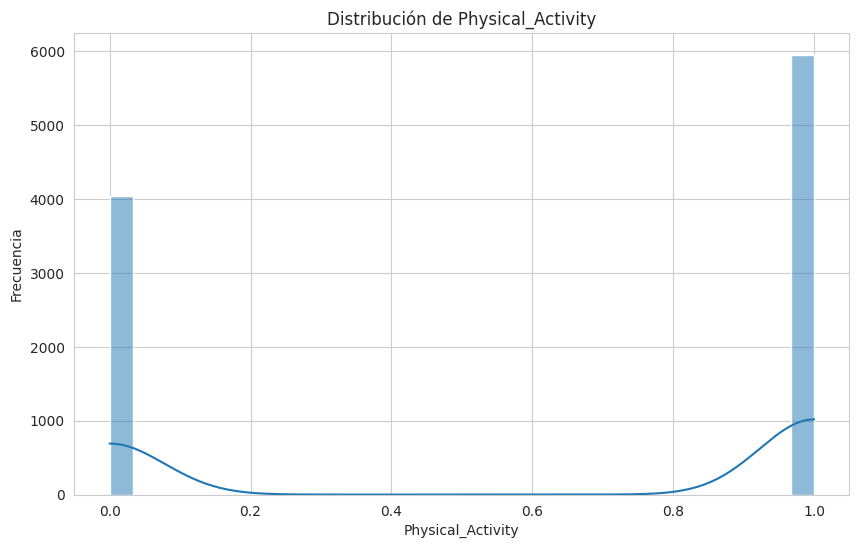

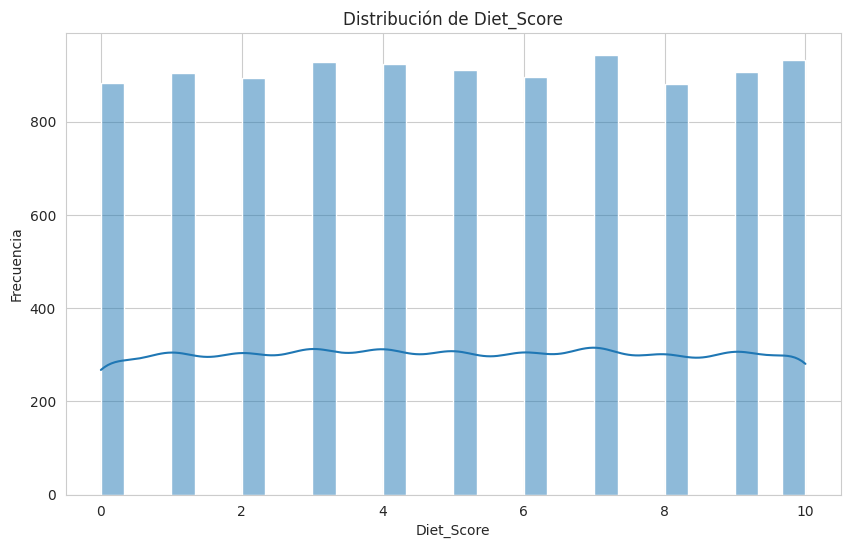

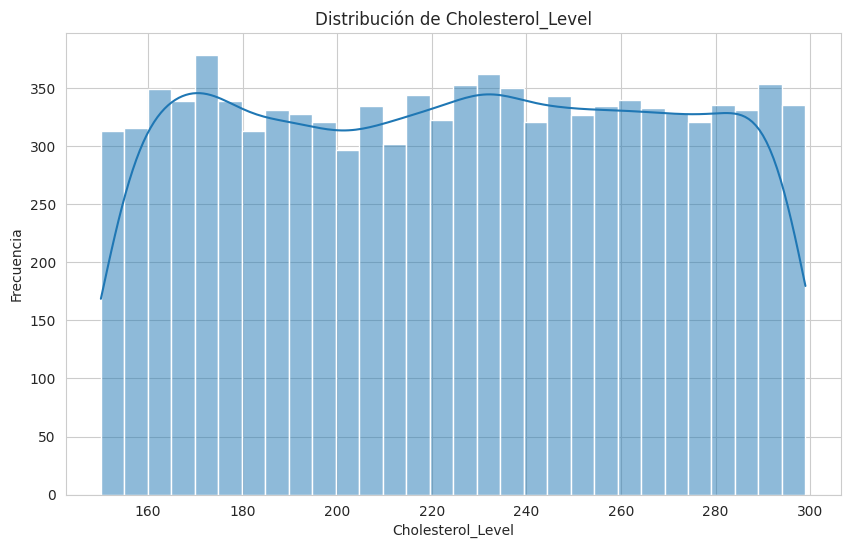

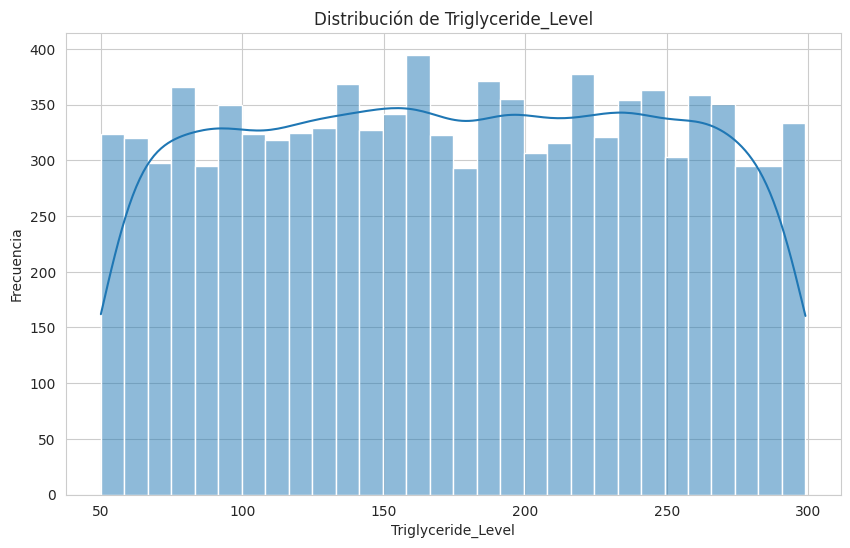

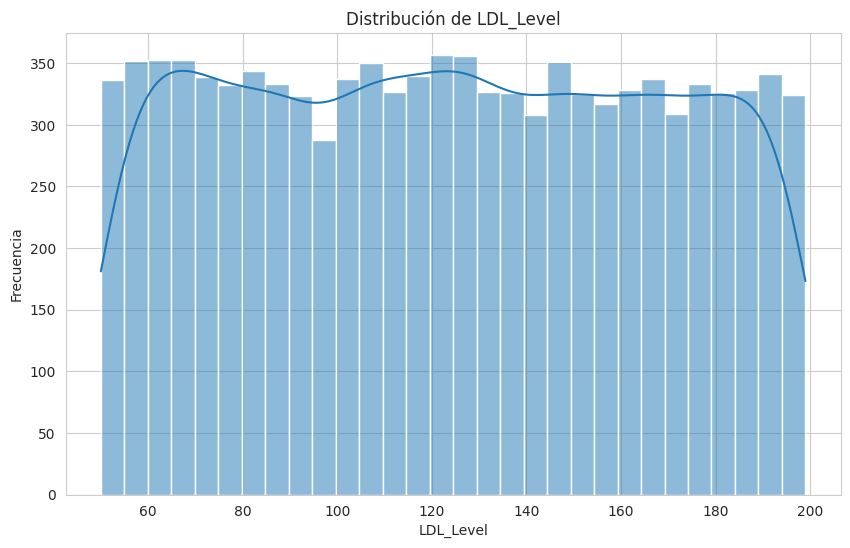

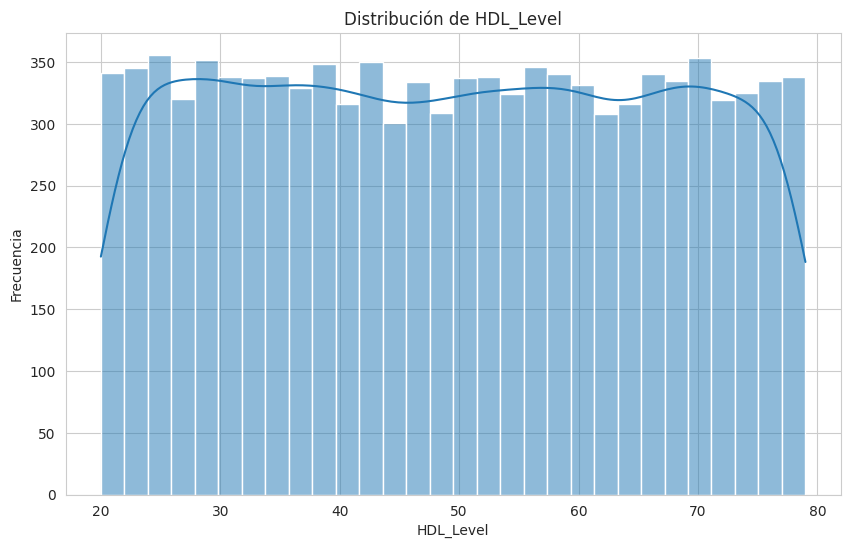

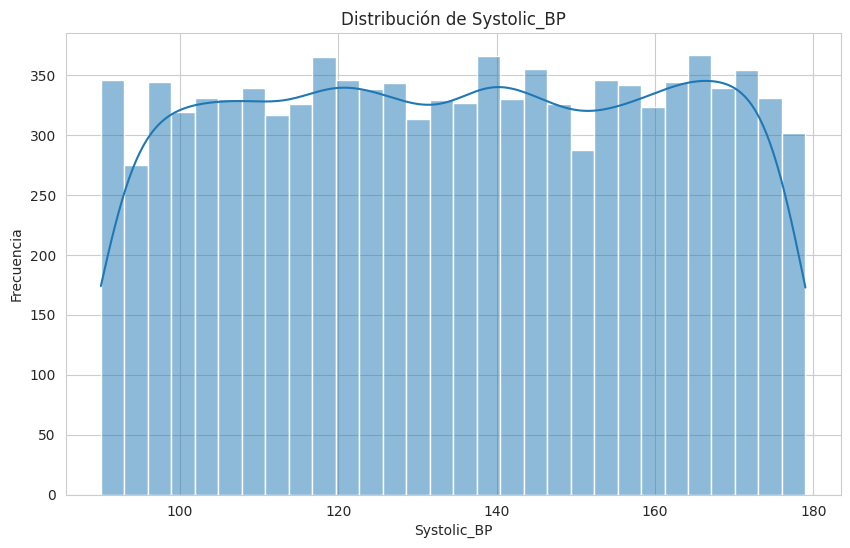

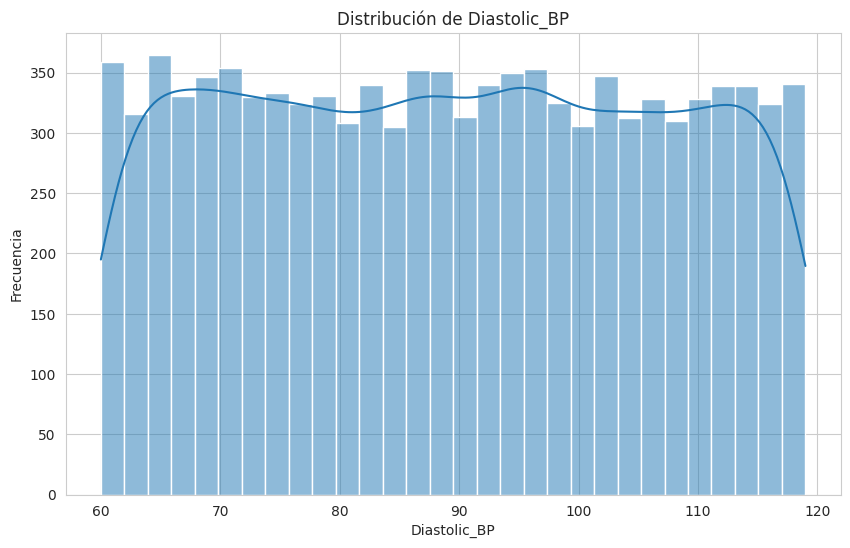

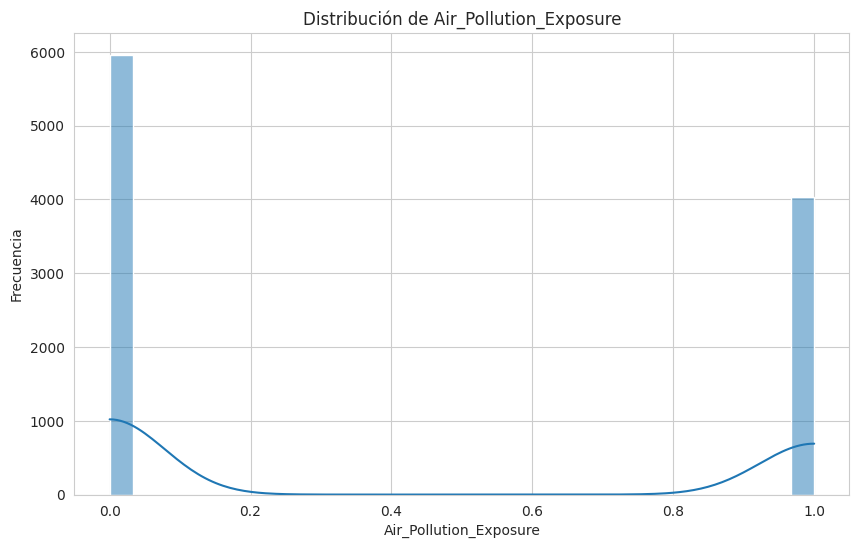

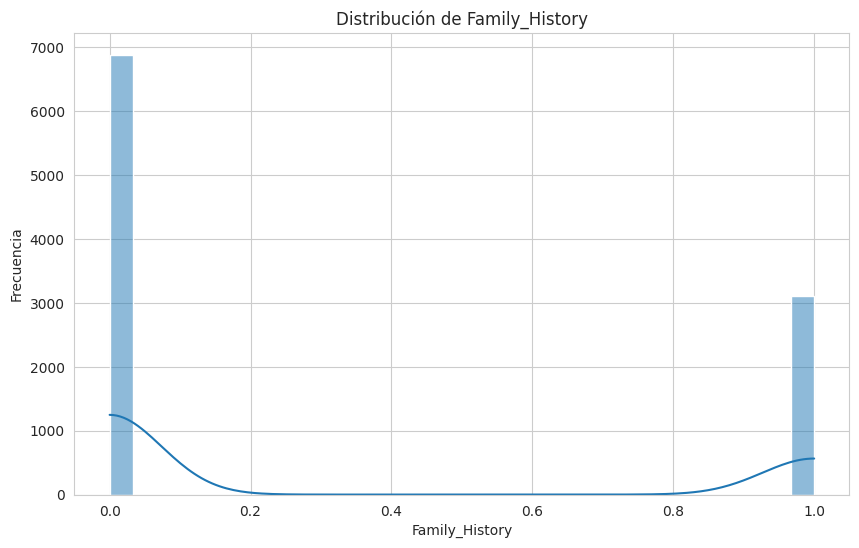

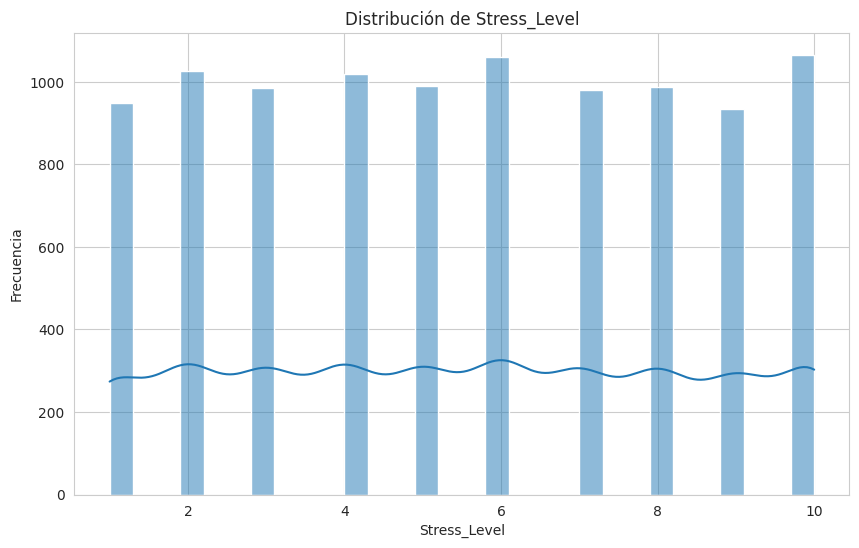

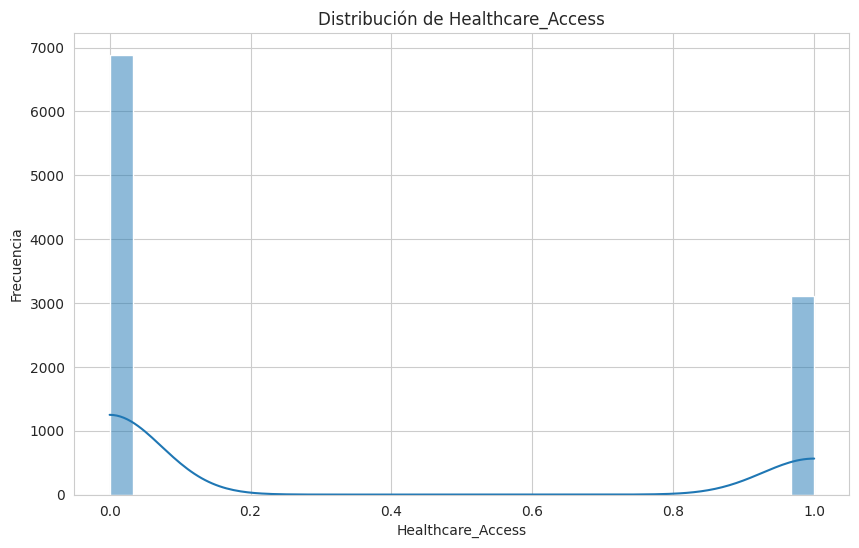

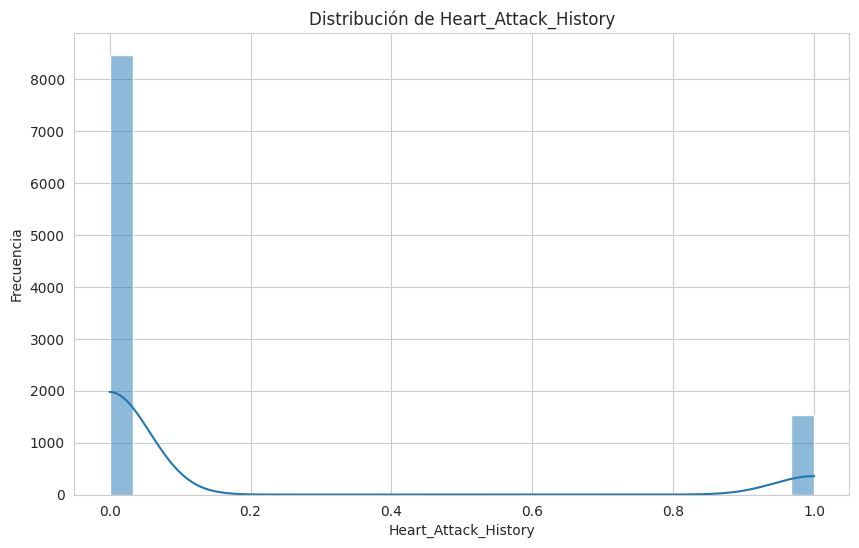

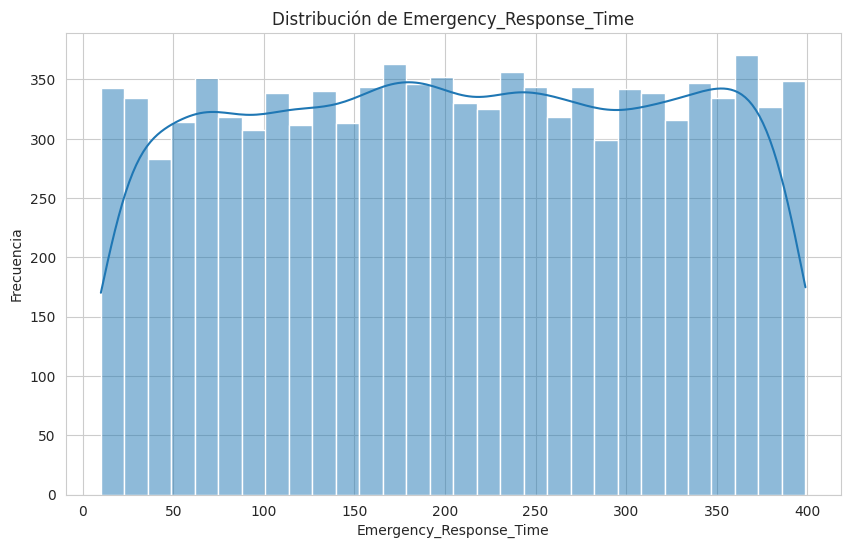

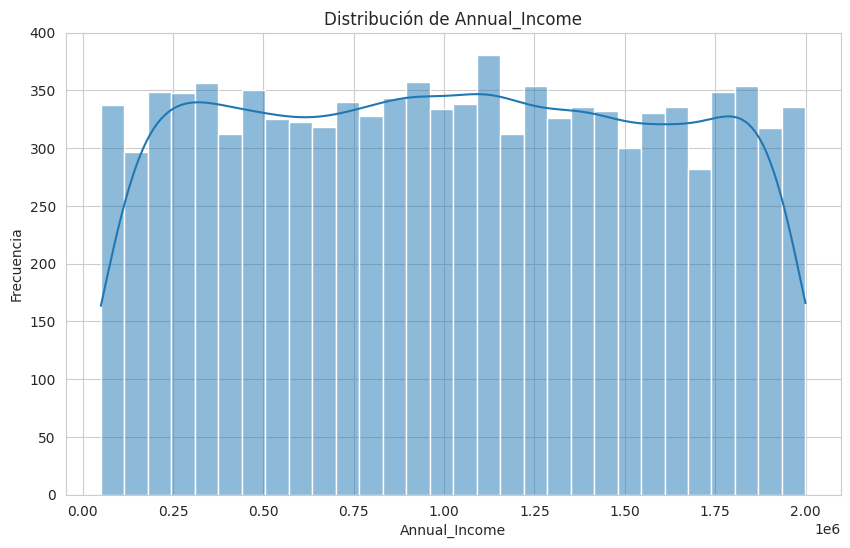

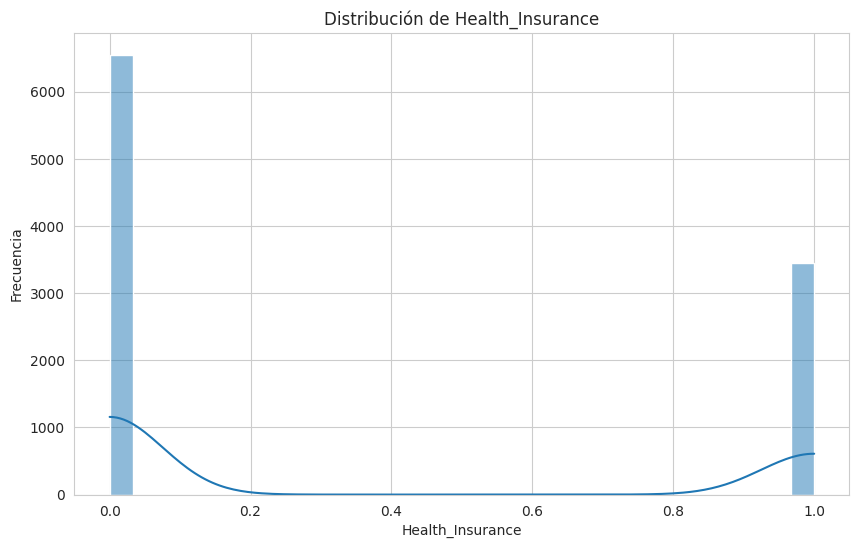

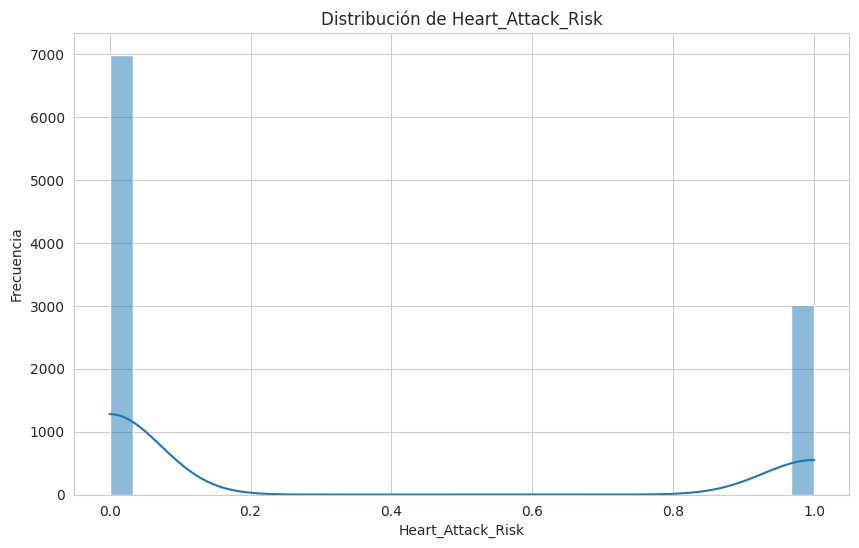

In [49]:
# Se realiza un análisis univariado de las variables que componen el dataset
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop(['Patient_ID'])
for col in num_cols:
    plt.figure()
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

Aquí también se puede observar que hay variables binarias que se encuentran desbalanceadas: Diabetes, Hypertension, Obesity, Smoking, Alcohol_Consumption, Physical_Activity, Family_History, Healthcare_Access, Heart_Attack_History, Health_Insurance, Air_Pollution_Exposure. En todos los casos hay una marcada mayoría de valores en 0 (ausencia del factor) y una menor proporción de valores en 1.

Las variables continuas presentan comportamientos mas uniformes y sin presencia clara de asimetrías graves. Estas variables estan bien distribuidas para el modelado: Age, Cholesterol_Level, Triglyceride_Level, LDL_Level, HDL_Level, Systolic_BP, Diastolic_BP, Annual_Income, Emergency_Response_Time.

Las variables con distribución discreta también estan distribuidas relativamente de manera uniforme: Diet_Score y Stress_Level.




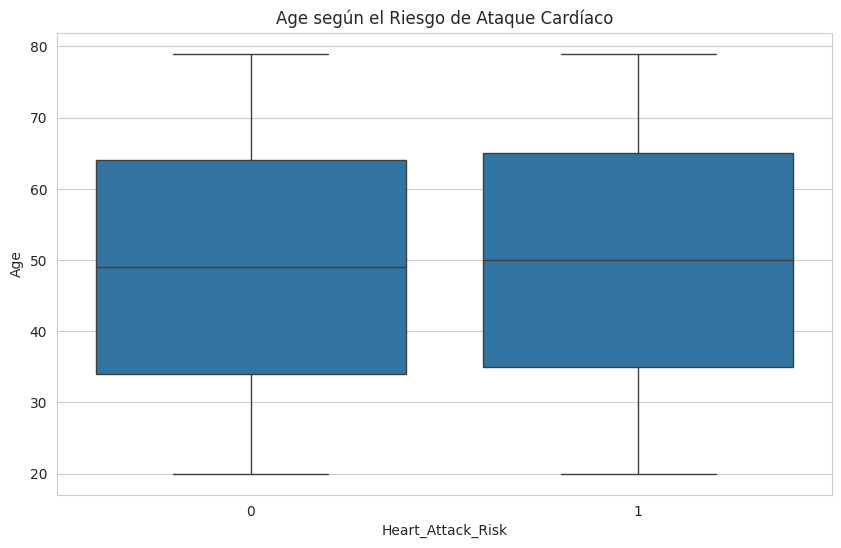

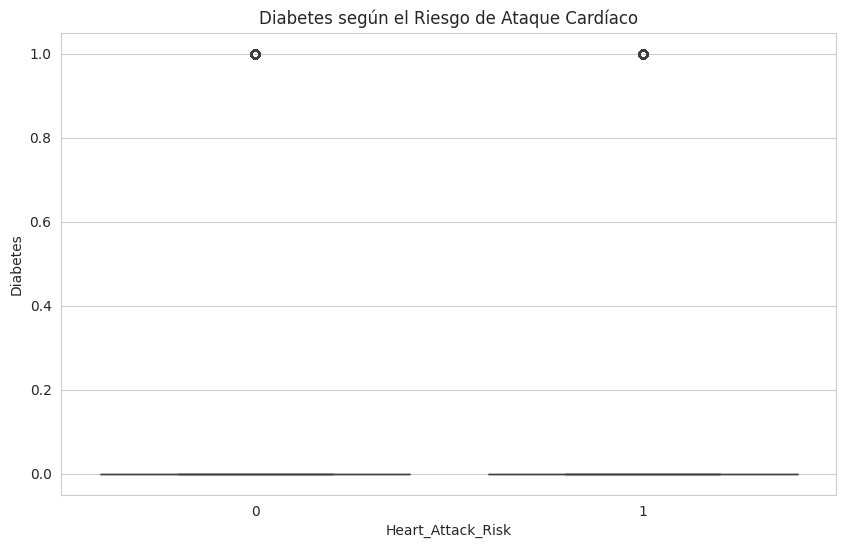

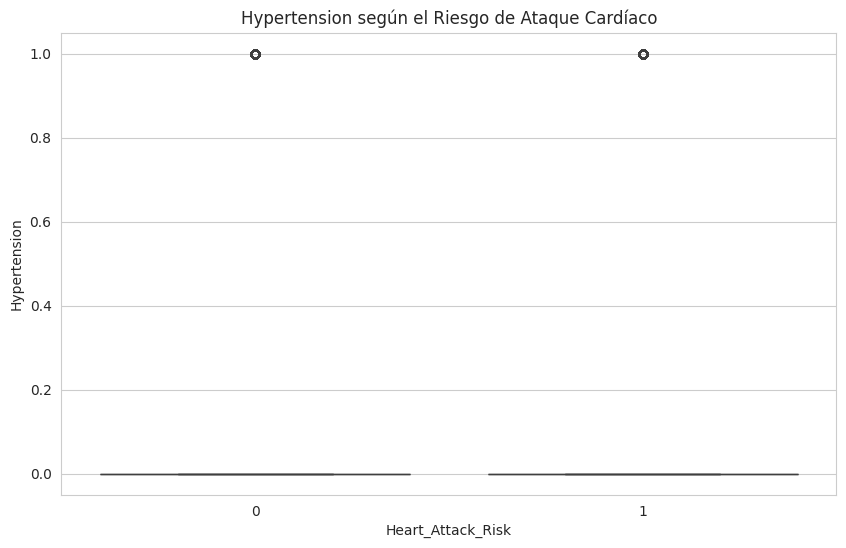

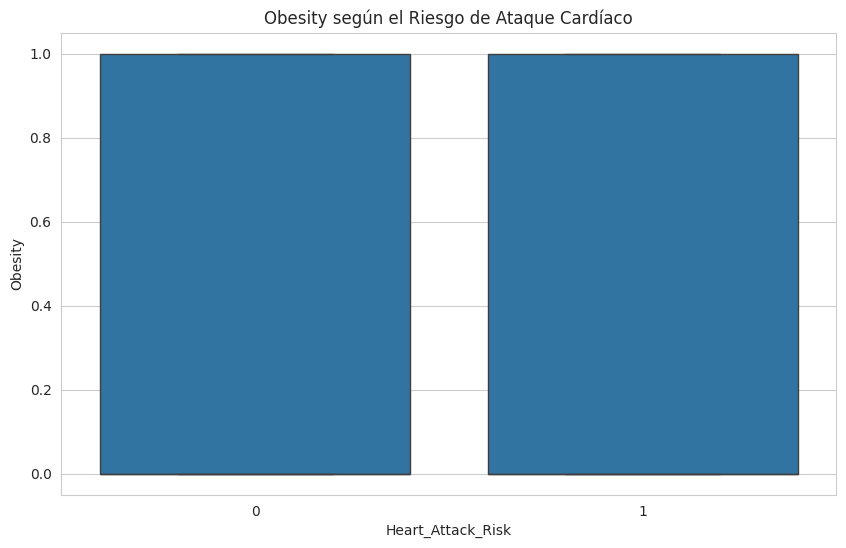

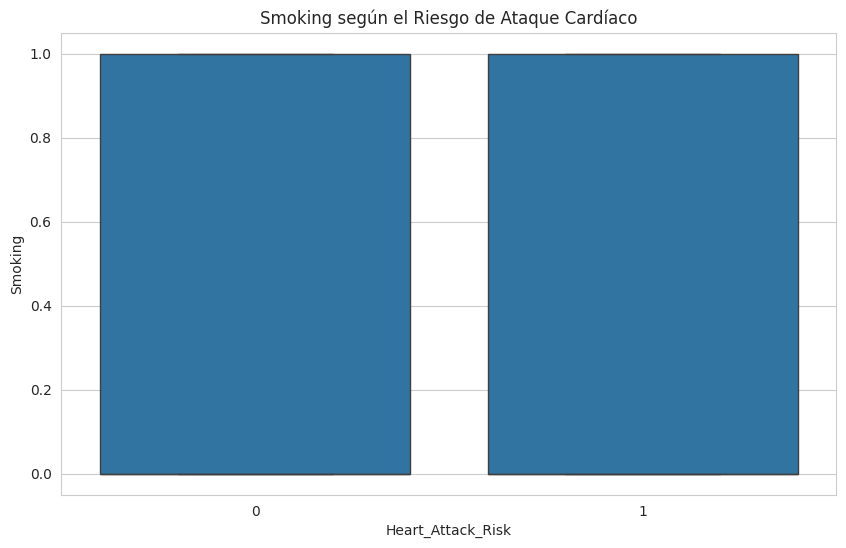

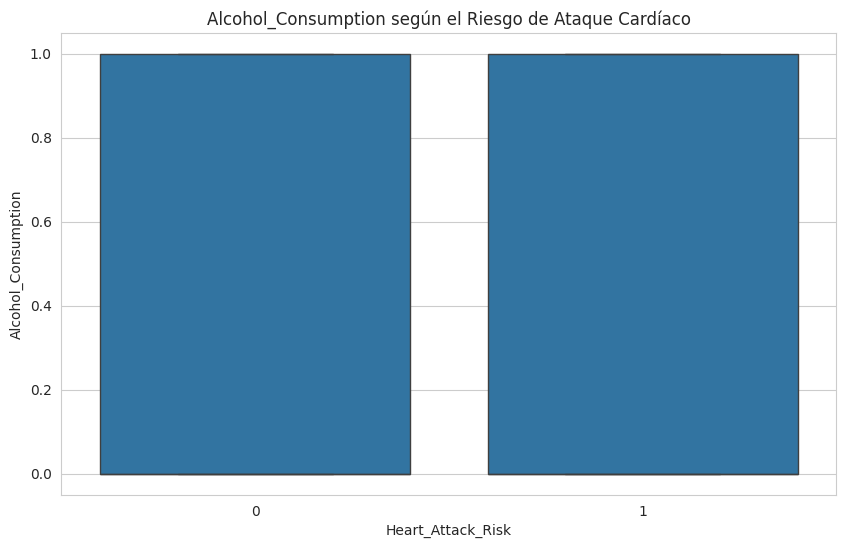

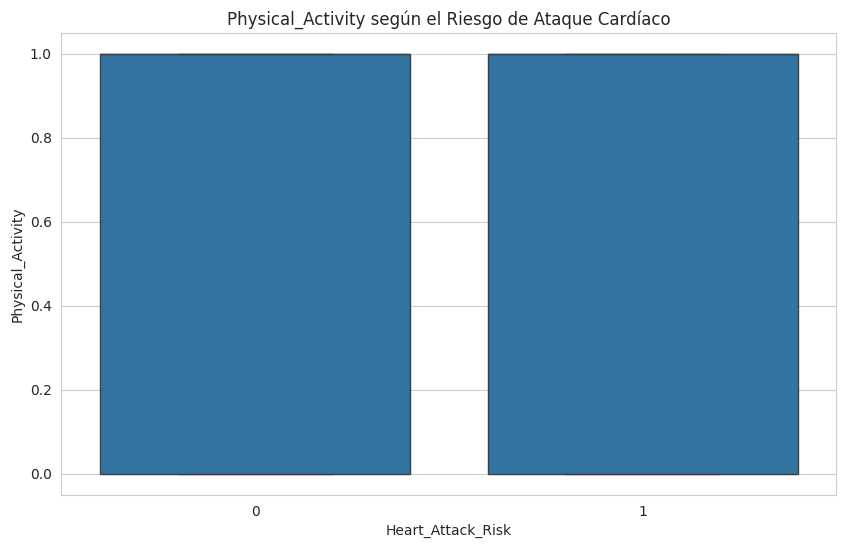

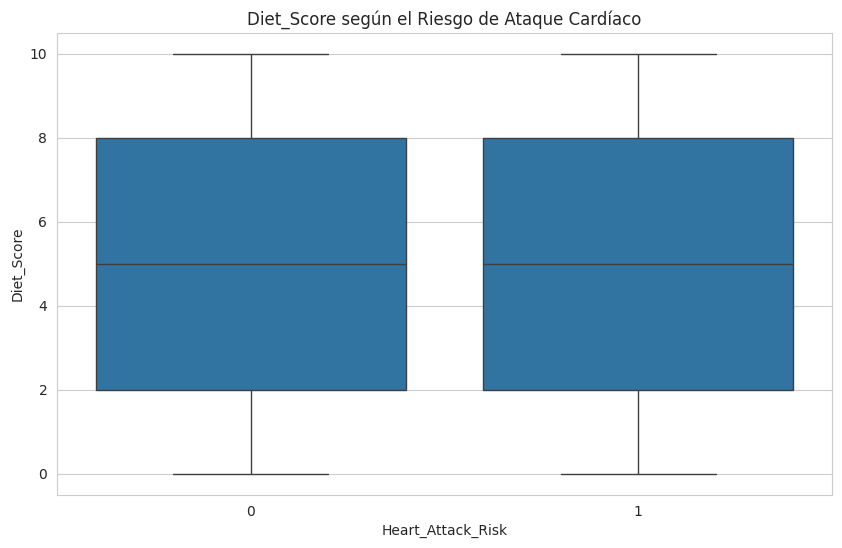

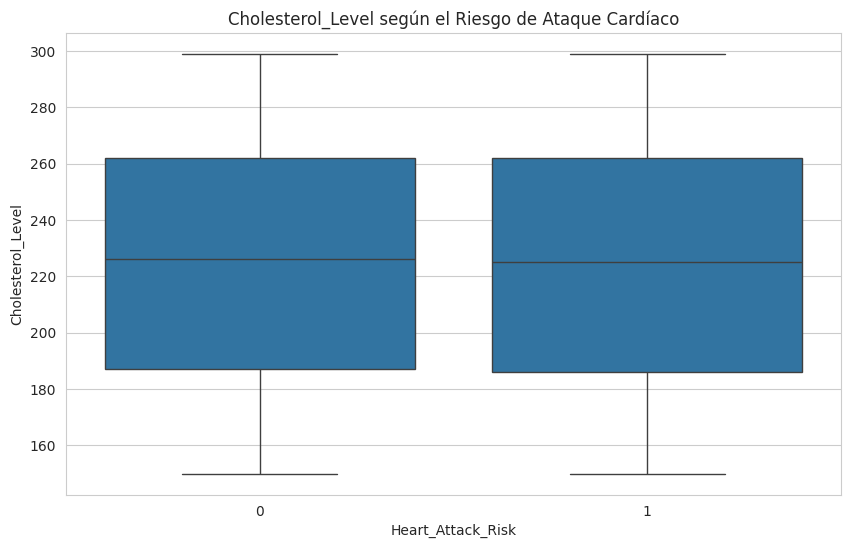

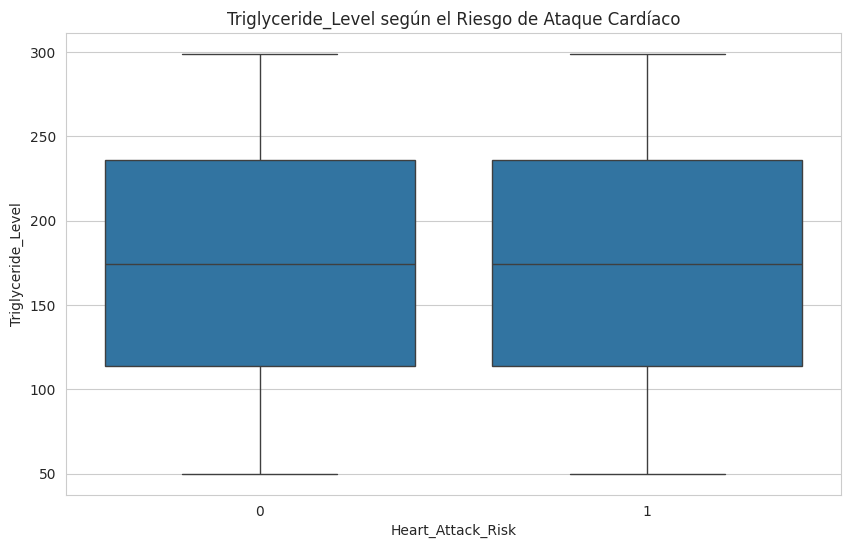

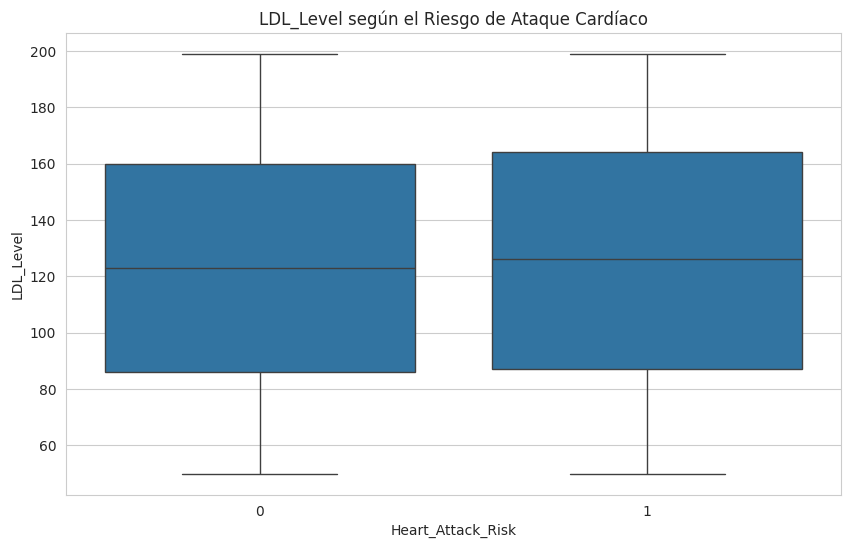

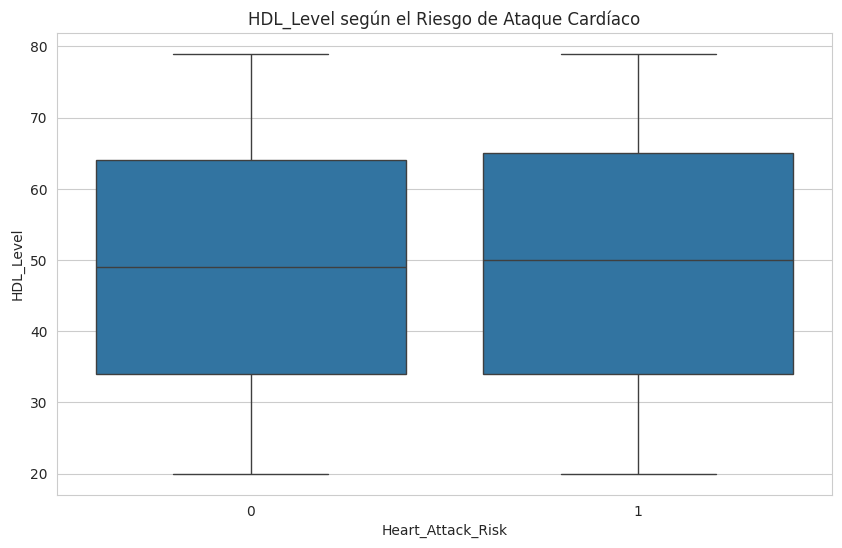

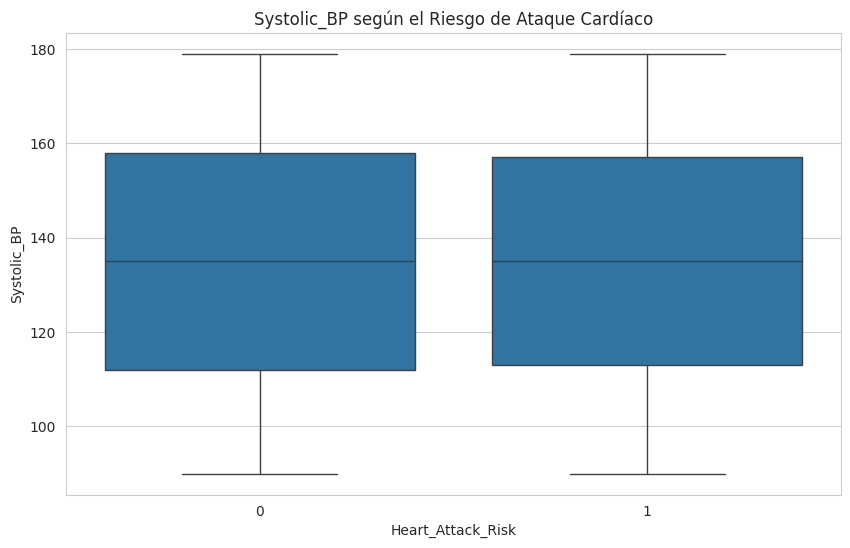

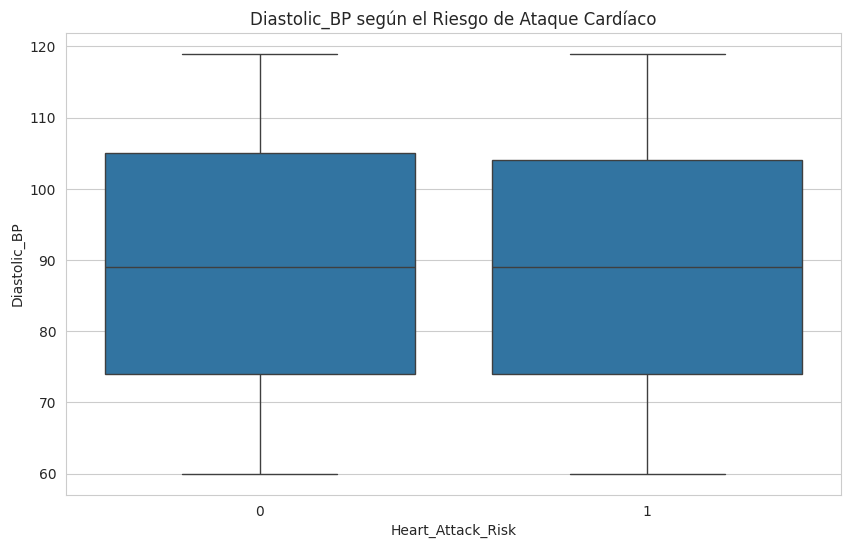

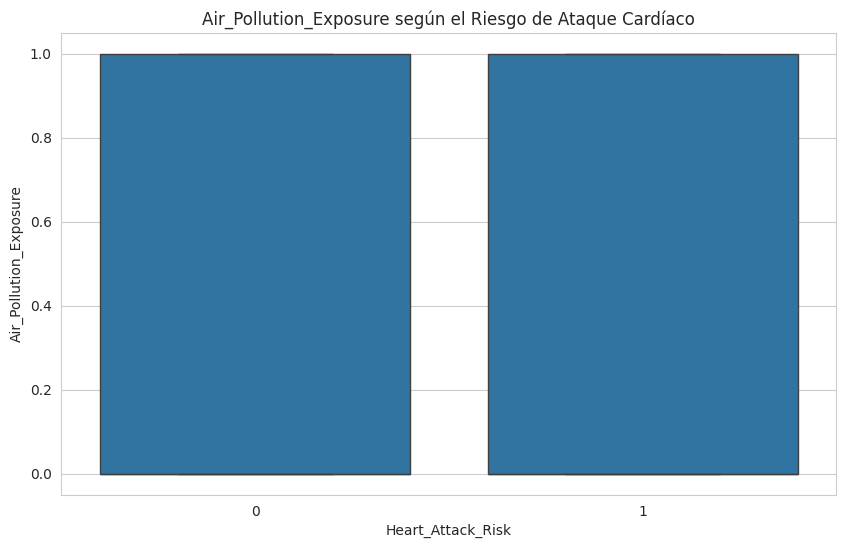

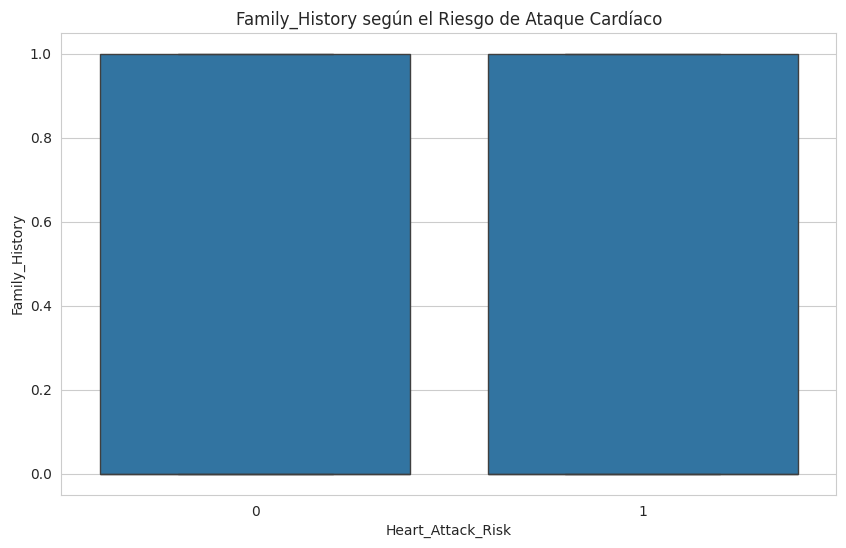

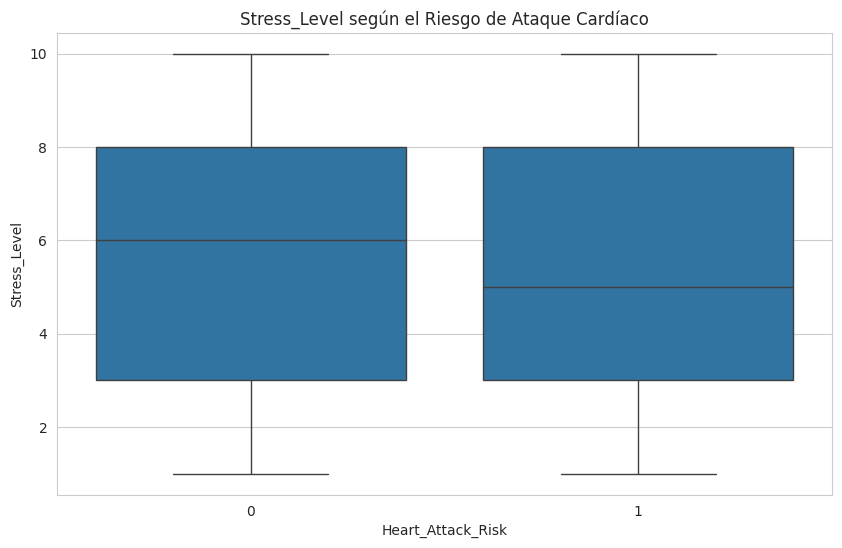

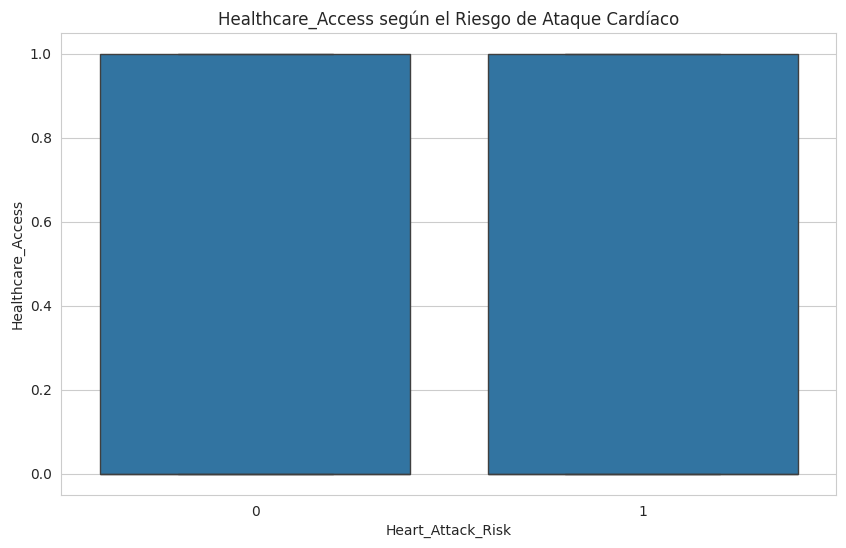

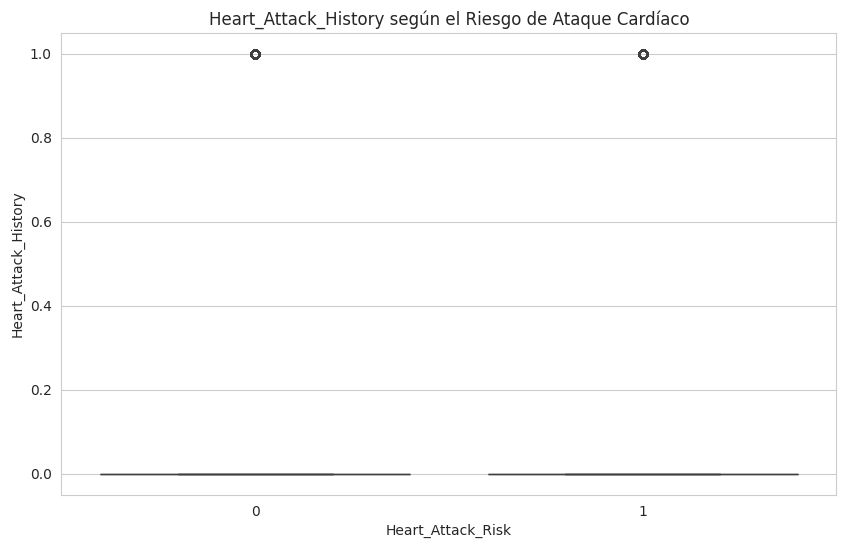

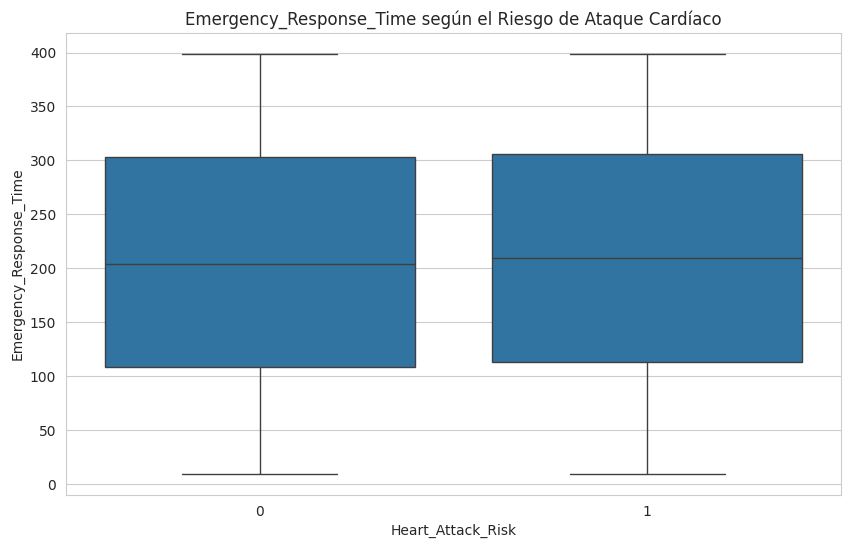

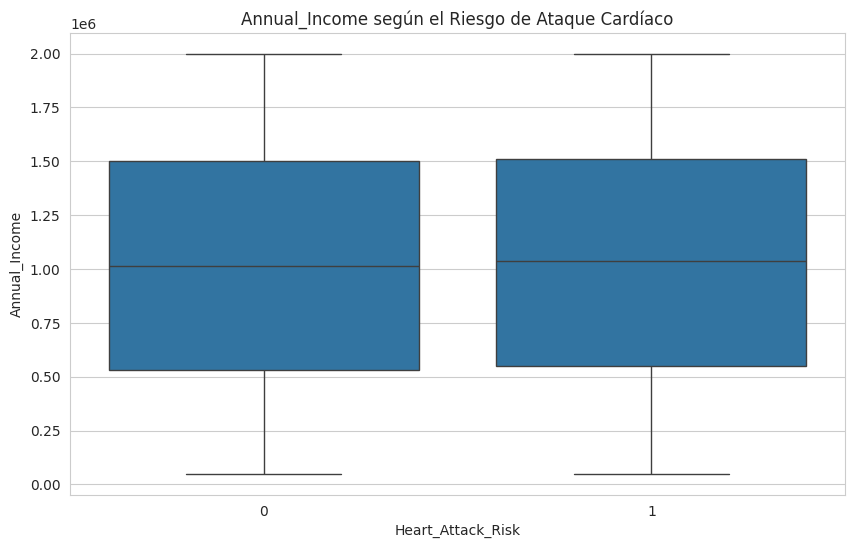

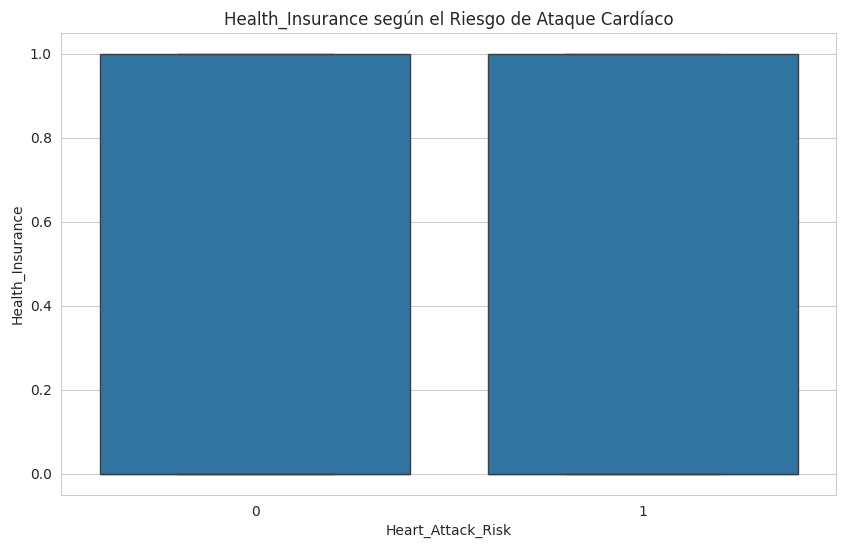

In [50]:
# Se realiza un análisis bivariado entre la variable objetivo y las variables predictoras
for col in num_cols:
    if col != 'Heart_Attack_Risk':
        plt.figure()
        sns.boxplot(x='Heart_Attack_Risk', y=col, data=data)
        plt.title(f"{col} según el Riesgo de Ataque Cardíaco")
        plt.show()

Algunas características de las variables obtenidas a partir de los gráficos anteriores:
1. Age: la distribución es bastante similar en ambos grupos, la mediana en la case de riesgo alto es levemente superior, eso nos dice que la edad podría ser un factor leve de riesgo pero no determinante por si sola.
2. Diabetes y Hypertension: muestra valores extremos en ambos individuos.
3. Obesity, Smoking, Alcohol_Consumption, Physical_Activity, Air_Pollution_Exposure y Family_History: muestran valores prácticamente idénticos entre las clases, no hay diferencia en la proporcion de personas con estos hábitos entre grupos de riesgo.
4. Diet_Score: la mediana y los rangos intercuartílicos son casi iguales en ambos grupos, esto nos podria decir que la calidad de la dieta por si sola no muestra relación aparente con el riesgo.
5. Cholesterol_Level, Triglyceride_Level, LDL_Level, HDL_Level: las distribuciones entre los grupos de riesgo son mu similares en todas las variables lipídicas, la mediana y el rango intercuartílico apenas varían.
6. Systolic_BP, Diastolic_BP: se muestran distribuciones prácticamente idénticas entre las clases.
7. Stress_Level: en esta variable si hay una diferencia visible en la mediana entre los grupos, los individuos con riesgo alto de ataque cardíaco tienen a tener niveles de estrés ligeramente más bajos.


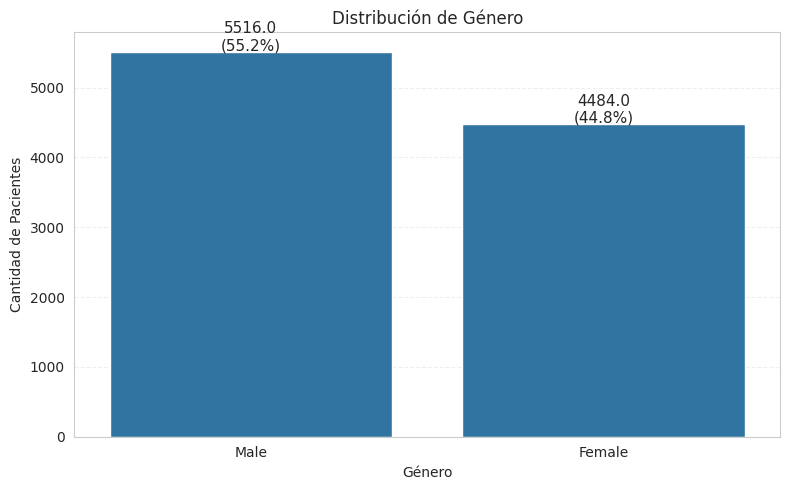

In [51]:
# Se analiza la proporción de hombres y mujeres

plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Gender', order=['Male', 'Female'])
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pacientes')

total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10,
            f'{height}\n({height/total:.1%})',
            ha='center', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



Se responde la primer pregunta del proyecto **P1: ¿Cuál es la proporción de hombres y mujeres en el conjunto de datos?**

Existe una mayor proporción de masculinos en el conjunto de datos, con un 55.2% de hombres y un 44.8% de mujeres.

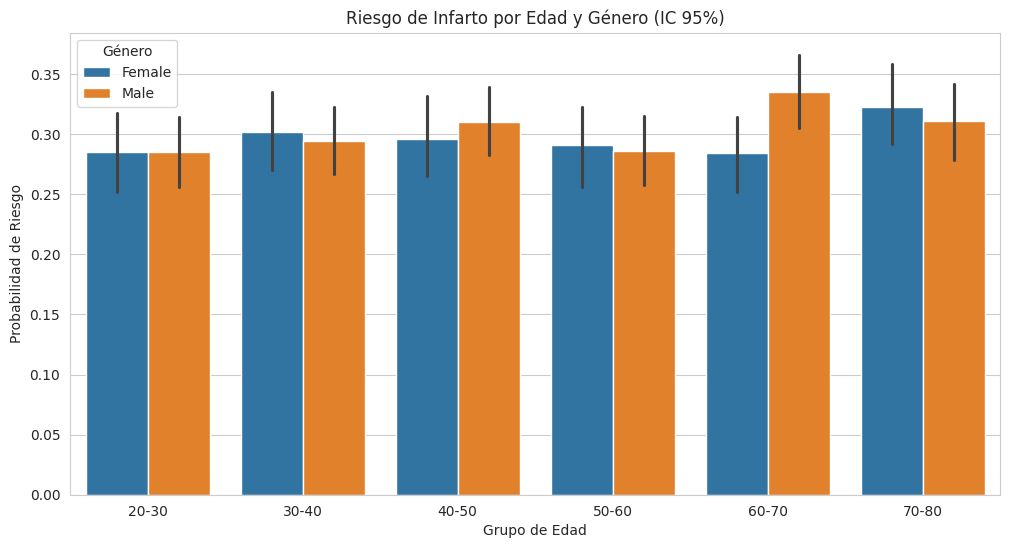

In [52]:
# Se analiza si existe diferencia en el rango de edad con mayor riesgo entre hombres y mujeres
# Grupos de edad
data['Age_Group'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Visualización
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Age_Group', y='Heart_Attack_Risk', hue='Gender', errorbar=('ci', 95))
plt.xlabel('Grupo de Edad')
plt.ylabel('Probabilidad de Riesgo')
plt.title('Riesgo de Infarto por Edad y Género (IC 95%)')
plt.legend(title='Género')
plt.show()

Se responde la pregunta del proyecto **P2. ¿Existe diferencia en el rango de edad con mayor riesgo entre hombres y mujeres?**

Se puede observar que para los hombres hay mayor riesgo entre los 60-70 años y para las mujeres entre 70-80 años.

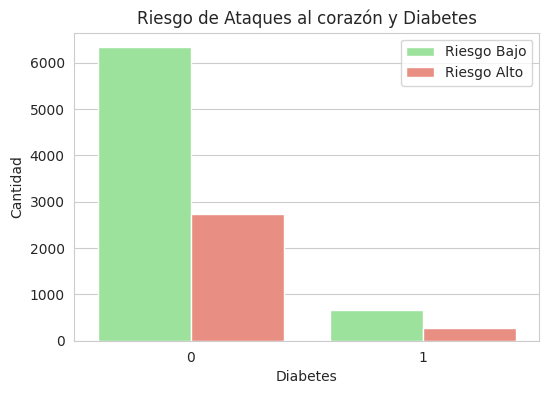

In [53]:
# Se analiza si los pacientes que no tienen diabetes tienen menor riesgo de ataques al corazón
def plot_risk_factor(column, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, hue="Heart_Attack_Risk", data=data, palette=["lightgreen", "salmon"])
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Cantidad")
    plt.legend(["Riesgo Bajo", "Riesgo Alto"])
    plt.show()

plot_risk_factor("Diabetes", "Riesgo de Ataques al corazón y Diabetes")

La hipótesis **H1. Los pacientes que no tienen diabetes tienen menor riesgo de ataques al corazón** se valida.

Se puede observar que los pacientes que no tienen diabetes tienen menor riesgo de ataques al corazón

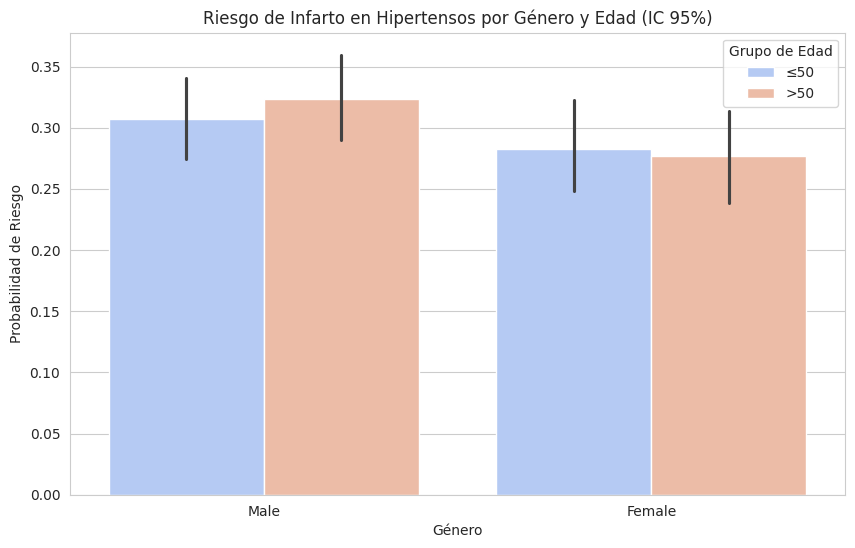

In [54]:
# Se analiza si Los hombres con hipertensión tienen mayor riesgo de infarto que las mujeres hipertensas, especialmente después de los 50 años
# Grupos de edad
data['Age_Group'] = pd.cut(data['Age'], bins=[20, 50, 79], labels=['≤50', '>50'])

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=data[data['Hypertension'] == 1], x='Gender', y='Heart_Attack_Risk', hue='Age_Group',
            errorbar=('ci', 95), palette='coolwarm')
plt.title('Riesgo de Infarto en Hipertensos por Género y Edad (IC 95%)')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Riesgo')
plt.legend(title='Grupo de Edad')
plt.show()

La hipotesis **H2. Los hombres con hipertensión tienen mayor riesgo de infarto que las mujeres hipertensas, especialmente después de los 50 años** se confirma.

La barra de hombres >50 años es más alta que la de mujeres en el mismo grupo.

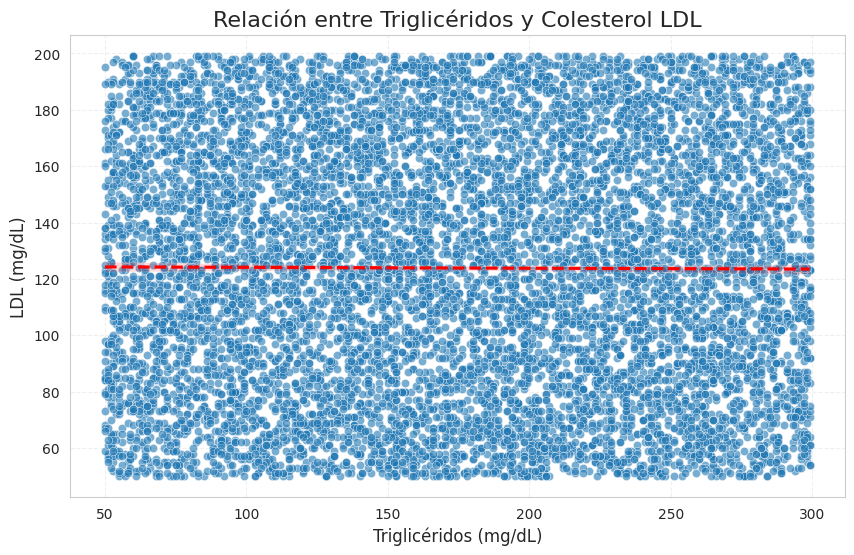

In [55]:
# Se analiza si existe una relación entre el colesterol LDL y los triglicéridos.

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Triglyceride_Level',
    y='LDL_Level',
    data=data,
    alpha=0.6
)
sns.regplot(
    x='Triglyceride_Level',
    y='LDL_Level',
    data=data,
    scatter=False,
    color='red',
    line_kws={'linestyle': '--'}
)

# Gráfocp
plt.title('Relación entre Triglicéridos y Colesterol LDL', fontsize=16)
plt.xlabel('Triglicéridos (mg/dL)', fontsize=12)
plt.ylabel('LDL (mg/dL)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)


La hipótesis **H3. Existe una relación entre el colesterol LDL y los triglicéridos** se refuta.

Los puntos están bastante dispersos en el gráfico, por lo que pareciera no haber una relación fuerte entre los triglicéridos y el colesterol LDL.
La línea de tendencia es horizontal, por lo que podemos afirmar que no existe una correlación significativa entre las variables.

In [56]:
# Se analizan los coeficientes de correlación entre las variables numéricas
numeric_data = data.select_dtypes(include=['int64', 'float64', 'uint8']) # Sólo numéricas
numeric_data.corr()

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
Patient_ID,1.000000,0.009750,-0.013217,0.006447,-0.013353,-0.005823,-0.013774,0.011959,-0.006913,-0.000171,...,0.011993,0.003689,-0.003127,0.020750,-0.003233,-0.015761,0.009581,0.008703,0.000755,0.020455
Age,0.009750,1.000000,0.014416,0.000362,-0.017950,-0.004821,-0.000620,-0.003665,-0.013711,-0.017093,...,0.015541,0.012010,0.006995,0.027918,-0.009453,0.000817,-0.009703,-0.005499,-0.014164,0.015517
Diabetes,-0.013217,0.014416,1.000000,0.000503,0.011883,-0.003754,-0.003425,0.004564,0.004130,0.011206,...,0.000855,-0.007684,-0.005355,0.002528,-0.012591,0.005105,-0.004761,-0.013209,-0.012486,-0.009278
Hypertension,0.006447,0.000362,0.000503,1.000000,-0.021602,0.013566,-0.005855,0.019834,-0.000557,0.003471,...,0.008208,-0.021029,-0.006311,0.010283,-0.003937,-0.001627,0.014022,0.000021,0.003384,-0.001228
Obesity,-0.013353,-0.017950,0.011883,-0.021602,1.000000,-0.012488,0.000249,0.012211,0.009928,0.003271,...,-0.009770,-0.003428,0.012954,-0.024856,0.001171,0.011407,0.014716,0.000961,0.004185,-0.002004
Smoking,-0.005823,-0.004821,-0.003754,0.013566,-0.012488,1.000000,-0.027975,-0.019869,0.005772,0.008381,...,-0.009187,-0.008196,0.002702,0.011203,0.005012,0.004465,-0.005621,0.016120,0.003244,-0.012504
Alcohol_Consumption,-0.013774,-0.000620,-0.003425,-0.005855,0.000249,-0.027975,1.000000,-0.009374,0.011434,-0.010791,...,-0.002908,0.005587,0.008467,-0.007691,-0.005519,0.007556,-0.002171,-0.001635,-0.005769,-0.017283
Physical_Activity,0.011959,-0.003665,0.004564,0.019834,0.012211,-0.019869,-0.009374,1.000000,-0.001762,0.012979,...,0.009291,-0.016468,-0.011762,-0.005404,0.032163,-0.000337,0.002487,0.001603,0.000976,0.005968
Diet_Score,-0.006913,-0.013711,0.004130,-0.000557,0.009928,0.005772,0.011434,-0.001762,1.000000,0.008693,...,-0.015253,-0.001458,-0.004007,-0.002405,0.002431,0.000080,-0.003211,-0.002154,-0.004053,0.010623
Cholesterol_Level,-0.000171,-0.017093,0.011206,0.003471,0.003271,0.008381,-0.010791,0.012979,0.008693,1.000000,...,0.006900,-0.001557,0.002665,0.010012,0.018018,0.011309,-0.002897,0.006885,0.010062,-0.003054


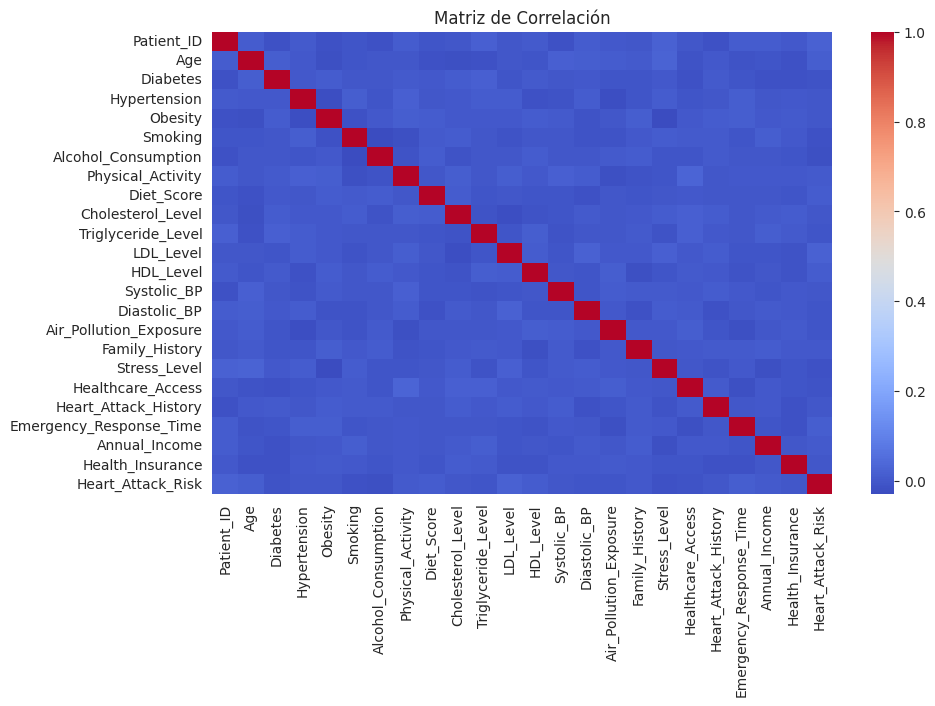

In [57]:
# Mapa de calor para visualizar la correlación entre las variables numéricas
plt.figure(figsize=(10,6))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix,
    cmap='coolwarm'
)
plt.title('Matriz de Correlación')
plt.show()

La matriz de correlación muestra la relación lineal entre todas las variables numéricas del dataset, incluido el objetivo Heart_Attack_Risk. Observando el gráfico no parece haber correlaciones fuertes entre las variables, lo que podría sugerir que la mayoría de las variables tienen una relación débil entre sí. Ésto podría significar que las relaciones entre algunas variables sean no lineales o dependan de múltiples combinaciones de variables.

In [58]:
# Detección de outliers con z-score
z_scores = np.abs(zscore(data.select_dtypes(include=np.number).drop(columns=["Patient_ID"])))
outliers = (z_scores > 3).sum(axis=0)
print("\nOutliers detectados por variable:")
print(pd.Series(outliers, index=data.select_dtypes(include=np.number).drop(columns=["Patient_ID"]).columns))


Outliers detectados por variable:
Age                          0
Diabetes                   929
Hypertension                 0
Obesity                      0
Smoking                      0
Alcohol_Consumption          0
Physical_Activity            0
Diet_Score                   0
Cholesterol_Level            0
Triglyceride_Level           0
LDL_Level                    0
HDL_Level                    0
Systolic_BP                  0
Diastolic_BP                 0
Air_Pollution_Exposure       0
Family_History               0
Stress_Level                 0
Healthcare_Access            0
Heart_Attack_History         0
Emergency_Response_Time      0
Annual_Income                0
Health_Insurance             0
Heart_Attack_Risk            0
dtype: int64


Solo la variable Diabetes presenta una cantidad significativa de outliers (929 casos), pero como la variable es binaria (sólo tiene valores 0 y 1) no se le dará importancia a ese resultado y se eliminarán las variables binarias del análisis de outliers.

In [59]:
# Se excluyen las variables binarias del análisis de outliers
numeric_data = data.select_dtypes(include=np.number).drop(columns=["Patient_ID"])
non_binary_cols = [col for col in numeric_data.columns if numeric_data[col].nunique() > 2]
z_scores = np.abs(zscore(numeric_data[non_binary_cols]))
outliers = (z_scores > 3).sum(axis=0)
print("\nOutliers detectados por variable:")
print(outliers)


Outliers detectados por variable:
[0 0 0 0 0 0 0 0 0 0 0]


In [60]:
# Las variables categóricas que no sean binarias u ordinales se deben codificar con One-Hot Encoding:
# Gender
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [61]:
# Se seleccionan las variables, se eliminan las que en el análisis bivariado se observa que no aportan significativamente al modelo
cols_to_drop = ['Health_Insurance', 'Alcohol_Consumption', 'Patient_ID', 'State_Name']
data_model = data_encoded.drop(columns=cols_to_drop, errors='ignore')
X_full = data_model.drop('Heart_Attack_Risk', axis=1)
X_full = X_full.apply(pd.to_numeric, errors='coerce')
X_full = X_full.dropna(axis=1, how='any')
y_full = data_model['Heart_Attack_Risk']

In [62]:
# escalado
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)

In [77]:
# Se divide el modelo para entrenar y test
X_train, X_test, y_train, y_test = train_test_split(X_full_scaled, y_full, test_size=0.3, random_state=42)

In [83]:
# entrenamiento del modelo
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [85]:
# Predicción
y_pred = model.predict(X_test)


In [86]:
# evaluación del modelo
cm_k5 = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:\n", cm_k5)
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("\nPrecisión:", accuracy_score(y_test, y_pred))


Matriz de Confusión:
 [[1775  322]
 [ 744  159]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.70      0.85      0.77      2097
           1       0.33      0.18      0.23       903

    accuracy                           0.64      3000
   macro avg       0.52      0.51      0.50      3000
weighted avg       0.59      0.64      0.61      3000


Precisión: 0.6446666666666667


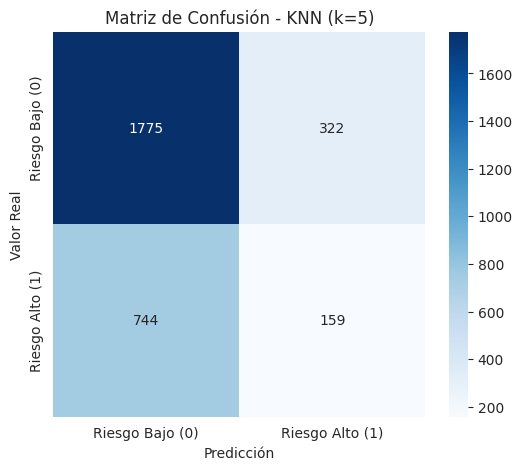

In [87]:
labels = ['Riesgo Bajo (0)', 'Riesgo Alto (1)']
# mapa de calor para la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm_k5, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - KNN (k=5)')
plt.show()

Resultados:
1. Verdaderos negativos = 1775
2. Falsos positivos = 322
3. Falsos negativos = 744
4. Verdaderos positivos = 159

El modelo acierta en un 64.4% de los casos

El modelo funciona bien para la clase de bajo riesgo (0) con buen recall (85%) y F1-score (77%). Sin embargo, falla en la mayoría de los casos para la clase de alto riesgo (1), sólo detecta al 18% de los pacientes con riesgo alto, esto es crítico en este contexto en el que los falsos negativos tienen una gran importancia.

In [88]:
# cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(model, X_full_scaled, y_full, cv=skf, scoring='f1')
print("\nF1-score por fold:", f1_scores)
print("F1-score promedio:", f1_scores.mean())


F1-score por fold: [0.20368364 0.21029573 0.19912473 0.23231257 0.23906083]
F1-score promedio: 0.21689549871805167


Con la validación cruzada confirmamos lo antes expresado: el modelo tiene un desempeño muy bajo para la clase minoritaria, es decir, riesgo alto (F1-Score = 0.21).
Se probará ajustando el valor k = 9.

In [69]:
# Se repetirá el modelado para k = 9

In [89]:
# Se divide el modelo para entrenar y test
X_train, X_test, y_train, y_test = train_test_split(X_full_scaled, y_full, test_size=0.3, random_state=42)

In [90]:
# entrenamiento del modelo
model_k9 = KNeighborsClassifier(n_neighbors=9)
model_k9.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [91]:
# Predicción
y_pred_k9 = model_k9.predict(X_test)

In [92]:
# evaluación del modelo
cm_k9 = confusion_matrix(y_test, y_pred_k9)
print("\nMatriz de Confusión:\n", cm_k9)
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_k9))
print("\nPrecisión:", accuracy_score(y_test, y_pred_k9))


Matriz de Confusión:
 [[1900  197]
 [ 811   92]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79      2097
           1       0.32      0.10      0.15       903

    accuracy                           0.66      3000
   macro avg       0.51      0.50      0.47      3000
weighted avg       0.59      0.66      0.60      3000


Precisión: 0.664


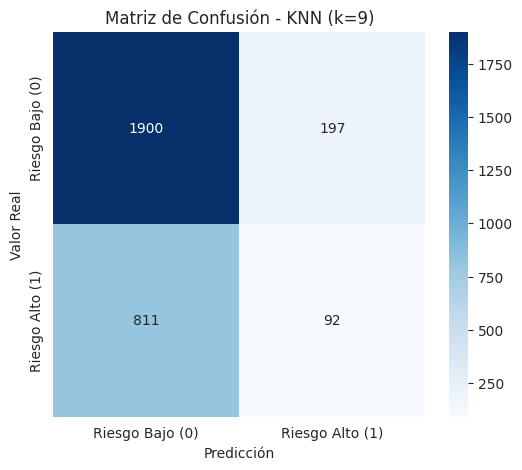

In [93]:
labels = ['Riesgo Bajo (0)', 'Riesgo Alto (1)']
# mapa de calor para la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm_k9, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - KNN (k=9)')
plt.show()

In [75]:
# cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(model_k9, X_full_scaled, y_full, cv=skf, scoring='f1')
print("\nF1-score por fold:", f1_scores)
print("F1-score promedio:", f1_scores.mean())


F1-score por fold: [0.20368364 0.21029573 0.19912473 0.23231257 0.23906083]
F1-score promedio: 0.21689549871805167


Resultados:
1. Verdaderos negativos = 1900
2. Falsos positivos = 197
3. Falsos negativos = 811
4. Verdaderos positivos = 92


Los resultados indican una precisión del 66.4%, es decir que el modelo acierta en 2 de cada 3 casos.
El desempeño para la clase 1 (riesgo alto) es aun más bajo: sólo detecta el 10% de los pacientes con riesgo alto, además de que hay muchos falsos negativos.
El resultado de la validación cruzada refuerza la idea de que el modelo tiene bajo poder predictivo para la clase 1.
El sesgo hacia la clase 0 es muy fuerte y eso genera que el modelo falle al detectar correctamente los casos más importantes (riesgo alto).

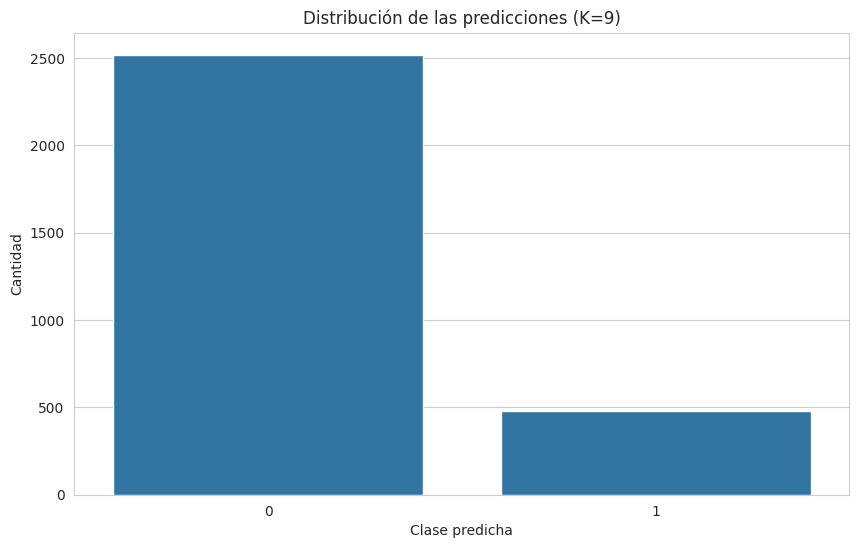

In [76]:
# === VISUALIZACIÓN: DISTRIBUCIÓN DE PREDICCIONES ===
sns.countplot(x=y_pred_k9)
plt.title("Distribución de las predicciones (K=9)")
plt.xlabel("Clase predicha")
plt.ylabel("Cantidad")
plt.show()



Con los resultados obtenidos no se puede afirmar que la hipótesis **H4. Un modelo de clasificación será capaz de predecir con precisión el riesgo de ataque cardíaco en base a variables como edad, condiciones médicas previas, estilo de vida y acceso a la salud.** se cumpla completamente. Aunque el modelo logra predecir bien la clase mayoritaria (riesgo bajo) falla significativamente al detectar la clase más crítica para nuestro objetivo: el riesgo alto.

Esto podría deberse a que las variables disponibles no son suficientes, el modelo elegido podría no ser el adecuado y se debería intentar con modelos más complejos o es necesario aplicar estrategias adiconales para balancear las clases.

**Conclusiones finales**

Este proyecto tuvo como objetivo desarrollar un modelo de clasificación que permita predecir el riesgo de ataque al corazon en pacientes de India en base a variables relacionadas con la edad, condiciones médicas, estilo de vida y acceso a la salud.

A lo largo del proyecto, se realizó un análisis exploratorio de datos exhaustivo: no se detectaron valores nulos, se identificaron algunas variables redundantes que fueron eliminadas y se codificaron variables categóricas con one-hot encoding. También se aplicaron métodos estadísticos y visuales para evaluar la distribución y comportamiento de las variables respecto a la variable objetivo.

Se entrenó el modelo K-Nearest Neighbots (KNN) evaluando distintos valores de k (5 y 9). Si bien la mejor precisión se obtuvo con 9, alcanzando una precisión de 66.4%, con un recall de sólo el 10% falla aún más en identificar adecuadamente los casos de alto riesgo que son los más relevantes para el objetivo del proyecto, por lo que este modelo no es fiable para su suso en contextos clínicos donde detectar pacientes de alto riesgo es fundamental.
Por lo tanto, la hipótesis planteada no se cumple completamente.
